In [53]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
df=pd.read_csv('NSE-Tata-Global-Beverages-Limited.csv')

In [55]:
df.value_counts()

Date        Open    High    Low     Last    Close   Total Trade Quantity  Turnover (Lacs)
2018-10-08  208.00  222.25  206.85  216.00  215.15  4642146.0             10062.83           1
2013-10-08  157.00  157.80  155.20  155.80  155.80  1720413.0             2688.94            1
2013-10-09  155.70  158.20  154.15  155.30  155.55  2049580.0             3204.49            1
2018-09-11  222.50  225.40  214.85  216.35  216.00  3508990.0             7735.81            1
2018-09-10  222.50  235.15  220.65  221.05  222.00  7514106.0             17130.29           1
                                                                                            ..
2013-10-18  163.20  165.00  162.25  164.00  164.20  2540836.0             4163.49            1
2013-10-17  159.10  162.90  158.25  161.75  162.00  2724697.0             4381.60            1
2013-10-15  160.00  160.20  155.35  157.10  158.05  1145582.0             1805.49            1
2013-10-14  160.85  161.45  157.70  159.30  159.45  128

In [56]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [57]:
df=df.sort_values(by='Date')

In [58]:
df['Date'].diff()

1234      NaT
1233   1 days
1232   1 days
1231   1 days
1230   3 days
        ...  
4      3 days
3      2 days
2      1 days
1      1 days
0      3 days
Name: Date, Length: 1235, dtype: timedelta64[ns]

In [59]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [60]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [61]:
df.index=df['Date']

In [62]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
2013-10-09,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2013-10-10,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
2013-10-11,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
2013-10-14,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
scaler=MinMaxScaler()

In [65]:
df['Close']=scaler.fit_transform(df[['Close']])

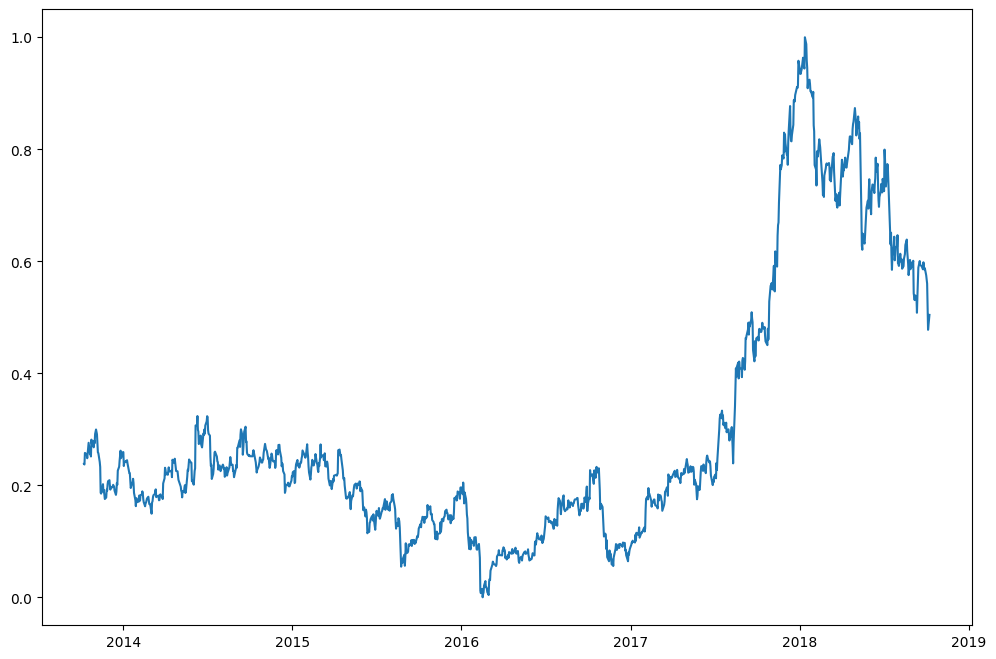

In [78]:
plt.figure(figsize=(12,8))
plt.plot('Close',label='Closing Prices',data=df)

In [66]:
def sliding_window(df,window_size=5):
    np_df=df.to_numpy()
    X,y=[],[]
    for i in range(0,len(np_df)-window_size):
        X.append(np_df[i:i+window_size])
        y.append(np_df[i+window_size])
    return np.array(X),np.array(y)

In [67]:
window_size=5

X,y=sliding_window(df['Close'], window_size)

In [68]:
X.shape

(1230, 5)

In [69]:
print(X)

[[0.23823398 0.2371134  0.25773196 0.25728373 0.25459435]
 [0.2371134  0.25773196 0.25728373 0.25459435 0.24831914]
 [0.25773196 0.25728373 0.25459435 0.24831914 0.2660242 ]
 ...
 [0.58987001 0.58538772 0.58762887 0.57485433 0.56006275]
 [0.58538772 0.58762887 0.57485433 0.56006275 0.51792918]
 [0.58762887 0.57485433 0.56006275 0.51792918 0.47758853]]


In [70]:
y.shape

(1230,)

In [71]:
print(y)

[0.24831914 0.2660242  0.27588525 ... 0.51792918 0.47758853 0.50425818]


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=False,test_size=0.3)

In [81]:
X_train=X_train.reshape(-1,window_size,1)
X_test = X_test.reshape(-1, window_size, 1)

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [84]:
model=Sequential()


model.add(LSTM(64,activation='relu',return_sequences=True,input_shape=(window_size,1)))
model.add(LSTM(32,activation='relu'))
model.add(Dense(1))


model.compile(optimizer='adam',loss='mse')

In [85]:
from tensorflow.keras.callbacks import EarlyStopping

In [86]:
early_stop=EarlyStopping(patience=20,monitor='val_loss')

In [87]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=40,batch_size=32,callbacks=[early_stop],verbose=-1)

Epoch 1/40
Epoch 2/40
Epoch 3/40
Epoch 4/40
Epoch 5/40
Epoch 6/40
Epoch 7/40
Epoch 8/40
Epoch 9/40
Epoch 10/40
Epoch 11/40
Epoch 12/40
Epoch 13/40
Epoch 14/40
Epoch 15/40
Epoch 16/40
Epoch 17/40
Epoch 18/40
Epoch 19/40
Epoch 20/40
Epoch 21/40
Epoch 22/40
Epoch 23/40
Epoch 24/40
Epoch 25/40
Epoch 26/40
Epoch 27/40
Epoch 28/40
Epoch 29/40
Epoch 30/40
Epoch 31/40
Epoch 32/40
Epoch 33/40
Epoch 34/40
Epoch 35/40
Epoch 36/40
Epoch 37/40
Epoch 38/40
Epoch 39/40
Epoch 40/40


In [88]:
losses=pd.DataFrame(model.history.history)

<Axes: >

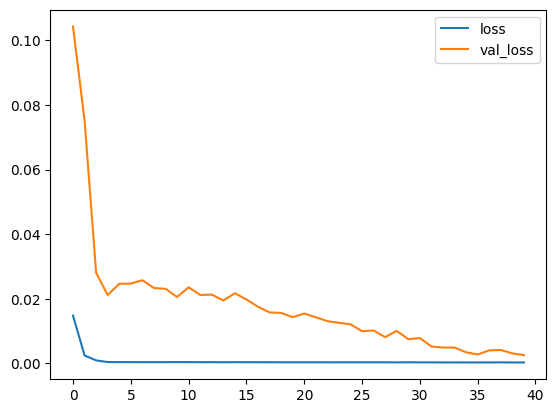

In [90]:
losses.plot()

In [97]:
LSTM_y_pred=model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [91]:
from sklearn.metrics import mean_squared_error

In [98]:
mean_squared_error(LSTM_y_pred,y_test)

0.0025548988655667037